<a href="https://colab.research.google.com/github/seunga2590/Machine-Learning/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

imdb = tf.keras.datasets.imdb

In [2]:
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [4]:
#pad_sequence = 각 문장길이 제한
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [5]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [14]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=50, batch_size=64, validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
313/313 [==============================] - 13s 35ms/step - loss: 0.4108 - accuracy: 0.8177 - val_loss: 0.4377 - val_accuracy: 0.7958
Epoch 2/50
313/313 [==============================] - 11s 35ms/step - loss: 0.4185 - accuracy: 0.8120 - val_loss: 0.4375 - val_accuracy: 0.7974
Epoch 3/50
313/313 [==============================] - 11s 36ms/step - loss: 0.4055 - accuracy: 0.8201 - val_loss: 0.4370 - val_accuracy: 0.7954
Epoch 4/50
313/313 [==============================] - 12s 37ms/step - loss: 0.4142 - accuracy: 0.8139 - val_loss: 0.4359 - val_accuracy: 0.8000
Epoch 5/50
313/313 [==============================] - 12s 38ms/step - loss: 0.4069 - accuracy: 0.8215 - val_loss: 0.4357 - val_accuracy: 0.7990
Epoch 6/50
313/313 [==============================] - 12s 38ms/step - loss: 0.4089 - accuracy: 0.8174 - val_loss: 0.4356 - val_accuracy: 0.8002
Epoch 7/50
313/313 [==============================] - 12s 38ms/step - loss: 0.4139 - accuracy: 0.8157 - val_loss: 0.4349 - val_accuracy:

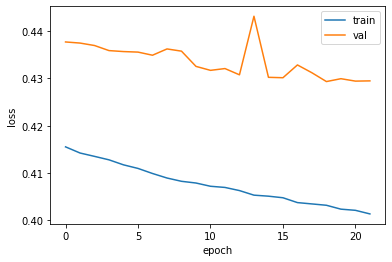

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [18]:
#dropout 추가 적용

model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16, input_length =100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [20]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=22, batch_size=64, validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/22
313/313 [==============================] - 13s 37ms/step - loss: 0.4236 - accuracy: 0.8054 - val_loss: 0.4349 - val_accuracy: 0.7982
Epoch 2/22
313/313 [==============================] - 11s 36ms/step - loss: 0.4169 - accuracy: 0.8122 - val_loss: 0.4361 - val_accuracy: 0.7942
Epoch 3/22
313/313 [==============================] - 11s 36ms/step - loss: 0.4335 - accuracy: 0.8034 - val_loss: 0.4333 - val_accuracy: 0.7990
Epoch 4/22
313/313 [==============================] - 12s 38ms/step - loss: 0.4166 - accuracy: 0.8088 - val_loss: 0.4322 - val_accuracy: 0.8020
Epoch 5/22
313/313 [==============================] - 12s 38ms/step - loss: 0.4198 - accuracy: 0.8056 - val_loss: 0.4310 - val_accuracy: 0.8004
Epoch 6/22
313/313 [==============================] - 12s 37ms/step - loss: 0.4221 - accuracy: 0.8083 - val_loss: 0.4310 - val_accuracy: 0.8040
Epoch 7/22
313/313 [==============================] - 12s 38ms/step - loss: 0.4215 - accuracy: 0.8061 - val_loss: 0.4416 - val_accuracy:

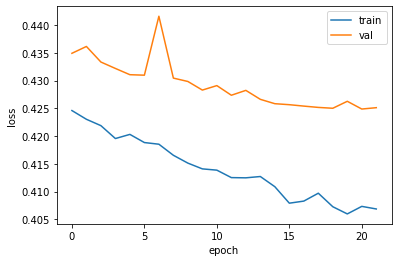

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [22]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [23]:
model3.summary()
#time step = 100

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_3 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [24]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=22, batch_size=64, validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/22
313/313 [==============================] - 26s 71ms/step - loss: 0.6929 - accuracy: 0.5267 - val_loss: 0.6922 - val_accuracy: 0.5754
Epoch 2/22
313/313 [==============================] - 22s 69ms/step - loss: 0.6912 - accuracy: 0.5920 - val_loss: 0.6871 - val_accuracy: 0.6284
Epoch 3/22
313/313 [==============================] - 22s 71ms/step - loss: 0.6805 - accuracy: 0.6436 - val_loss: 0.6421 - val_accuracy: 0.6906
Epoch 4/22
313/313 [==============================] - 22s 70ms/step - loss: 0.6177 - accuracy: 0.7030 - val_loss: 0.5828 - val_accuracy: 0.7214
Epoch 5/22
313/313 [==============================] - 22s 71ms/step - loss: 0.5715 - accuracy: 0.7233 - val_loss: 0.5523 - val_accuracy: 0.7386
Epoch 6/22
313/313 [==============================] - 22s 71ms/step - loss: 0.5476 - accuracy: 0.7394 - val_loss: 0.5295 - val_accuracy: 0.7570
Epoch 7/22
313/313 [==============================] - 22s 71ms/step - loss: 0.5283 - accuracy: 0.7522 - val_loss: 0.5219 - val_accuracy:

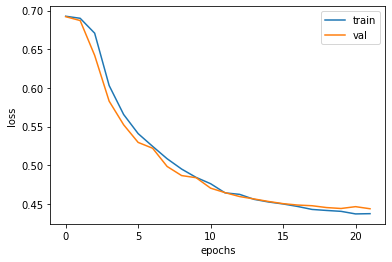

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()